In [ ]:
import json

In [ ]:
reviews1 = []
with open('/content/drive/My Drive/Beauty_5.json') as f:
    for line in f:
      try:
        reviews1.append(json.loads(line)["reviewText"])
      except:
        pass
        
reviews1[:20]

['Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.',
 'This palette was a decent price and I was looking for a few different shades. This palette conceals decently, however, it does somewhat cake up and crease.',
 "The texture of this concealer pallet is fantastic, it has great coverage and a wide variety of uses, I guess it's meant for professional makeup artists and a lot of the colours are of no use to me but I use at least two of them on a regular basis, and two more occasionally, which is the only reason I'm giving it for stars, I feel like the range of colors is kind of a waste for me, but the  product itself  is wonderful, it's not cakey, gives me a natural for and concealed my imperfections, therefore I highly recommend it :)",
 "I really can't tell what exactly this thing is. It's not powder but a kind of oil-ish pasty fluid. And so far I tried twice but it doesnt really s

In [ ]:
len(reviews1)

198502

In [ ]:
#### preprocessing
!pip install langdetect

     |████████████████████████████████| 983kB 8.1MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993193 sha256=110b751573d2d78e4d37a980be520b3c7c0d461ac21e332c1f6d18467b9fe0e3
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
Successfully built langdetect


In [ ]:
from langdetect import detect

In [ ]:
reviews = []
for sent in reviews1:
    try:
      if detect(sent) == 'en':
        reviews.append(sent) 
    except:
        pass
print(reviews[:5])
print(len(reviews))

['Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.', 'This palette was a decent price and I was looking for a few different shades. This palette conceals decently, however, it does somewhat cake up and crease.', "The texture of this concealer pallet is fantastic, it has great coverage and a wide variety of uses, I guess it's meant for professional makeup artists and a lot of the colours are of no use to me but I use at least two of them on a regular basis, and two more occasionally, which is the only reason I'm giving it for stars, I feel like the range of colors is kind of a waste for me, but the  product itself  is wonderful, it's not cakey, gives me a natural for and concealed my imperfections, therefore I highly recommend it :)", "I really can't tell what exactly this thing is. It's not powder but a kind of oil-ish pasty fluid. And so far I tried twice but it doesnt really show

In [ ]:
cream_reviews = [review for review in reviews if "sunscreen" in review]  #any(token.lower() == "cream" for token in review.split())

In [ ]:
len(cream_reviews)

3705

### 1st approach

In [ ]:
all_reviews = "".join(x for x in reviews)
all_reviews[:500]

"Very oily and creamy. Not at all what I expected... ordered this to try to highlight and contour and it just looked awful!!! Plus, took FOREVER to arrive.This palette was a decent price and I was looking for a few different shades. This palette conceals decently, however, it does somewhat cake up and crease.The texture of this concealer pallet is fantastic, it has great coverage and a wide variety of uses, I guess it's meant for professional makeup artists and a lot of the colours are of no use "

In [ ]:
!pip install rake-nltk
from rake_nltk import Rake

In [ ]:
r = Rake(min_length=1, max_length=2)
r.extract_keywords_from_text(str(all_reviews))
keywords = r.get_ranked_phrases_with_scores()

In [ ]:
import pandas as pd
keywords_list = [y for (x, y) in keywords]
scores_list = [x for (x, y) in keywords]

data_frame = pd.DataFrame(list(zip(keywords_list, scores_list)), columns=['Keyword', 'Score'])
final_df = data_frame.sort_values(by=['Score'], ascending=False)

top_10_df = final_df.iloc[:10, ]
print(top_10_df)

                 Keyword  Score
0          zino davidoff    4.0
228         fda mandates    4.0
236              elta md    4.0
235      emergencies ,:)    4.0
234    emulsifying agent    4.0
233   ethylhexyl cocoate    4.0
232        euro tinosorb    4.0
231    everywehre !!!!!!    4.0
230         fairly coily    4.0
229  fantastically vampy    4.0


### 2nd approach

In [ ]:
!pip install gensim
import gensim

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
stop_words = set(stopwords.words("english"))
junk_words = ['i','we',"me","us","you","be","can","they","our","ours","it","he","she","them","themself","himself",
              "herself","itself","itselves","themselves","could","must","ought",
              "one","oneself","is","are","shall","will","should","would","were","am","was","an","the","not","n't","lad","lady","some",
              "something","someone","somebody","onething","none","noone","nobody","nothing","anything","anybody",
              "any","so","as","can't","cant","cannot","dont","don't","donot","mr.","http","www","yu","u","da","com","now","then",
              "yet","get","do","go","come","too","even","home","still","ly","take","len","im","ve","ous","aa","b","c","d","ee","ff","ll","ii","make","find"]


In [ ]:
#preprocessing
import re
reviews_new = ["".join(re.sub()) for x in reviews]

In [ ]:
reviews_new[:2]

['Very oily and creamy  Not at all what I expected    ordered this to try to highlight and contour and it just looked awful    Plus  took FOREVER to arrive ',
 'This palette was a decent price and I was looking for a few different shades  This palette conceals decently  however  it does somewhat cake up and crease ']

In [ ]:
reviews_new1 = []
for review in reviews_new:
  sent = []
  for word in review.split():
    if word.lower() not in stop_words and word.lower() not in junk_words:
      sent.append(word)
  reviews_new1.append(sent)


In [ ]:
reviews_new1[:3]

[['oily',
  'creamy',
  'expected',
  'ordered',
  'try',
  'highlight',
  'contour',
  'looked',
  'awful',
  'Plus',
  'took',
  'FOREVER',
  'arrive'],
 ['palette',
  'decent',
  'price',
  'looking',
  'different',
  'shades',
  'palette',
  'conceals',
  'decently',
  'however',
  'somewhat',
  'cake',
  'crease'],
 ['texture',
  'concealer',
  'pallet',
  'fantastic',
  'great',
  'coverage',
  'wide',
  'variety',
  'uses',
  'guess',
  'meant',
  'professional',
  'makeup',
  'artists',
  'lot',
  'colours',
  'use',
  'use',
  'least',
  'two',
  'regular',
  'basis',
  'two',
  'occasionally',
  'reason',
  'giving',
  'stars',
  'feel',
  'like',
  'range',
  'colors',
  'kind',
  'waste',
  'product',
  'wonderful',
  'cakey',
  'gives',
  'natural',
  'concealed',
  'imperfections',
  'therefore',
  'highly',
  'recommend']]

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(reviews_new1, min_count=5, threshold=100) # higher threshold fewer phrases
bigram_mod = gensim.models.phrases.Phraser(bigram)
bigram_list = [bigram_mod[doc] for doc in reviews_new1]

In [ ]:
bigram_list[2]

['texture',
 'concealer',
 'pallet',
 'fantastic',
 'great',
 'coverage',
 'wide',
 'variety',
 'uses',
 'guess',
 'meant',
 'professional',
 'makeup',
 'artists',
 'lot',
 'colours',
 'use',
 'use',
 'least',
 'two',
 'regular_basis',
 'two',
 'occasionally',
 'reason',
 'giving',
 'stars',
 'feel',
 'like',
 'range',
 'colors',
 'kind',
 'waste',
 'product',
 'wonderful',
 'cakey',
 'gives',
 'natural',
 'concealed',
 'imperfections',
 'therefore',
 'highly_recommend']

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
texts_out = []
for sent in bigram_list:
    doc = nlp(" ".join(sent)) 
    texts_out.append([token.lemma_ for token in doc if token.pos_ in ['NOUN', 'ADJ', 'VERB', 'ADV']])
texts_out

[['oily',
  'expect',
  'order',
  'try',
  'highlight',
  'contour',
  'look',
  'awful',
  'take',
  'arrive'],
 ['decent',
  'price',
  'look',
  'different',
  'shade',
  'palette',
  'conceal',
  'decently',
  'however',
  'somewhat',
  'cake',
  'crease'],
 ['texture',
  'concealer',
  'pallet',
  'fantastic',
  'great',
  'coverage',
  'wide',
  'variety',
  'use',
  'guess',
  'mean',
  'professional',
  'makeup',
  'artist',
  'lot',
  'colour',
  'use',
  'use',
  'least',
  'regular_basis',
  'occasionally',
  'reason',
  'give',
  'star',
  'feel',
  'range',
  'color',
  'kind',
  'waste',
  'product',
  'wonderful',
  'cakey',
  'give',
  'natural',
  'conceal',
  'imperfection',
  'therefore'],
 ['really',
  'tell',
  'exactly',
  'thing',
  'powder',
  'ish',
  'pasty',
  'fluid',
  'far',
  'try',
  'twice',
  'really',
  'show',
  'color',
  'face'],
 ['little',
  'small',
  'expect',
  'last',
  'long',
  'time',
  'think',
  'great',
  'coverage',
  'price',
  'pay'

In [ ]:
texts_out[5]

['offer',
 'subscription',
 'form',
 'makeup',
 'use',
 'daily',
 'unnamed',
 'set',
 'lot',
 'blend',
 'sculpt',
 'highlight',
 'conceal',
 'product',
 'nicely',
 'pigment',
 'smooth',
 'applie',
 'well',
 'blend',
 'beautifully',
 'normal',
 'dry',
 'skin',
 'year',
 'work',
 'wonderfully',
 'also',
 'use',
 'silicone',
 'base',
 'primer',
 'work',
 'well',
 'skin',
 'type',
 'give',
 'fresh',
 'dewy',
 'look',
 'love',
 'good',
 'amount',
 'product',
 'money',
 'well',
 'worth',
 'cost',
 'say',
 'willing',
 'repurchase',
 'product',
 'say',
 'mere',
 'word']

In [ ]:
all_words = [word for word_list in texts_out for word in word_list]

In [ ]:
#frequency calculator
dict_freq = {}
for word in all_words:
  if word in dict_freq.keys():
    dict_freq[word] += 1
  else:
    dict_freq[word] = 1

In [ ]:
freq_data = pd.DataFrame({"words" : list(dict_freq.keys()),
                          "counts" : list(dict_freq.values())})
freq_data.sort_values(by = "counts",inplace= True, ascending= False,ignore_index= True)
freq_data.head(15)

,words,counts
0,use,5015
1,skin,3808
2,product,3314
3,hair,2151
4,face,1476
5,good,1438
6,work,1400
7,dry,1321
8,try,1310
9,feel,1250


In [ ]:
top_1000_words = list(freq_data.words[:1000])

In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [ ]:
wordcloud = WordCloud(max_font_size=50, background_color="white").generate(" ".join(top_1000_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

NameError: ignored

<Figure size 1728x1152 with 0 Axes>

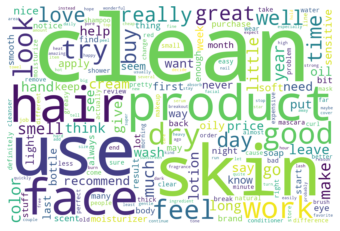

In [ ]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("sankar_exp.csv",names = ["word","counts"])

In [ ]:
df.head()

,word,counts
0,use,5015
1,skin,3808
2,product,3314
3,hair,2151
4,face,1476


In [ ]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

In [ ]:
"word "*3

'word word word '

In [ ]:
list(df.word)

['use',
 'skin',
 'product',
 'hair',
 'face',
 'good',
 'work',
 'dry',
 'try',
 'feel',
 'look',
 'great',
 'really',
 'well',
 'time']

In [ ]:
list(df.counts)

[5015,
 3808,
 3314,
 2151,
 1476,
 1438,
 1400,
 1321,
 1310,
 1250,
 1244,
 1217,
 1212,
 1120,
 1103]

In [ ]:
wordlist = ""
for word,count in zip(list(df.word),list(df.counts)):
  repeated_words = (word+" ")*int(count)
  wordlist += repeated_words


In [ ]:
wordcloud = WordCloud(collocations=False, background_color="white").generate(wordlist)

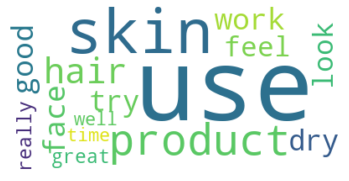

In [ ]:
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
df.loc[~df["word"].isin (["use","skin"])]

,word,count
2,product,3314
3,hair,2151
4,face,1476
5,good,1438
6,work,1400
7,dry,1321
8,try,1310
9,feel,1250
10,look,1244
11,great,1217


### 3rd approach

In [ ]:
import spacy

In [ ]:
from spacy.lang.en.stop_words import STOP_WORDS

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
# doc = nlp(cream_reviews[2].lower())
# for token in doc:
#   print(token.lemma_,token.dep_,token.head,[(child.lemma_,child.dep_) for child in token.children],)  

In [ ]:
change_list = {"dont" : "do not", "im" : "i am",
               "shouldnt" : "should not" , "wouldnt" : "would not" ,
               "havent" : "have not" , "aint" : "am not",
               "wasnt" : "was not", "werent" : "were not",
               "hasnt" : "has not" , "couldnt" : "could not",
               "hadnt" : "had not" , "wont" : "will not",
               "shallnt" : "shall not" , "isnt" : "is not",
               "arent" : "are not" , "cant" : "can not",
               "dunno" : "do not know" , "gonna" : "going to",
               "wanna" : "want to" , "youre" : "you are",
               "theyre" :"they are" , "doesnt" : "does not",
               "didnt" : "did not","don't" : "do not", "im" : "i am",
               "shouldn't" : "should not" , "wouldn't" : "would not" ,
               "haven't" : "have not" , "ain't" : "am not",
               "wasn't" : "was not", "weren't" : "were not",
               "hasn't" : "has not" , "couldn't" : "could not",
               "hadn't" : "had not" , "won't" : "will not",
               "shalln't" : "shall not" , "isn't" : "is not",
               "aren't" : "are not" , "can't" : "can not",
               "dunno" : "do not know" , "gonna" : "going to",
               "wanna" : "want to" , "you're" : "you are",
               "they're" :"they are" , "doesn't" : "does not",
               "didn't" : "did not","can't" : "can not",
               "can't" : "can not","needn't" : "need not"}

In [ ]:
def change(sent):
  tokens = sent.split()
  for i in range(len(tokens)):
    if tokens[i] in change_list.keys():
      tokens[i] = change_list[tokens[i]]
    else:
      tokens[i] = tokens[i]
  return " ".join(tokens)

In [ ]:
import re
def pre_processing(sent):
  sent = change(sent)
  sent = re.sub("[^A-Za-z]", " ", sent)
  doc = nlp(sent)
  filtered_sentence = []
  for word in doc:
      lexeme = nlp.vocab[word.text]
      if lexeme.is_stop == False and lexeme.is_punct == False and word.text != 'sunscreen':
          filtered_sentence.append(word.text)
  return " ".join(x for x in filtered_sentence)

In [ ]:
def bigram_constractor(sentence):
  sentence = pre_processing(sentence)
  doc = nlp(sentence)
  bigrams_list = []
  for token in doc:
    if token.pos_ in ["NOUN","ADJ","ADV","CCONJ","PROPN"] and token.dep_ in ["root","nsubj","dobj","pobj","advmod","xcomp","compound","acomp"]:
      for child in token.children:
        if len(child.text) > 0 and child.dep_ in ["amod","compound","advmod","not","conj","xcomp","acomp","nsubj","dobj","nounmod"] and child.pos_ != "PRON" and child.lemma_ not in  ["-PRON-","w/","be"] and len(child.lemma_) > 2:
          bigrams_list.append("{}_{}".format(child.lemma_,token.lemma_))
    # if  token.pos_ == "VERB":
    #   for child in token.children:
    #     if len(child.text) > 0 and child.dep_ in ["amod","compound","advmod","not","conj","xcomp","acomp","nsubj","dobj","nounmod","poss","appos","amod"] and child.pos_ != "PRON" and child.lemma_ not in  ["-PRON-","w/"]:
    #       bigrams_list.append("{}_{}".format(child.lemma_,token.lemma_))
  return bigrams_list

In [ ]:
print(cream_reviews[100].lower())
print("\n")
bigram_constractor(cream_reviews[100].lower())

olay regenerist daily regenerating serum, concentrated amino-peptide complex, fragrance free - 1.7 fl ozis, in my opinion, olay's finest product to date.first, it's fragrance-free.  men can use it too.it contains ingredients that help maintain the integrity of the epidermis in a silicone base.  it can be used under sunscreen or alone at night.  it can be used under makeup.  in fact, because of the silicones used, it's a bit like a primer.this serum is suitable for all skin types, though if you have dry skin,  you may want to apply moisturizer over it.  it's non-irritating and non-sensitizing.it contains antioxidants, peptides, and niacinamide.  olay touts niacinamide as being a sort of miracle ingredient.  the advertising for skin care products drives me a bit crazy, because they can only deliver so much.  olay's claims aside, i am 100% crazy about this product.  my skin really does look better - and no one is paying me to say that.i do not buy the regenerist eye.  i use this for my ey

['olay_regenerist',
 'concentrate_free',
 'integrity_epidermis',
 'epidermis_base',
 'silicone_base',
 'suitable_type',
 'skin_type',
 'dry_skin',
 'irritate_sensitizing',
 'non_sensitizing',
 'olay_tout',
 'sort_miracle',
 'miracle_ingredient',
 'skin_care',
 'advertising_product',
 'care_product',
 'crazy_product',
 'buy_eye',
 'regenerist_eye',
 'different_texture',
 'free_version',
 'age_skin',
 'regardless_type',
 'skin_type']

In [ ]:
all_bigrams = []
for sentence in cream_reviews:  
  all_bigrams.extend(bigram_constractor(sentence.lower()))

In [ ]:
all_bigrams_unigrams = []
for bigram in all_bigrams:
  all_bigrams_unigrams.extend(bigram.split("_"))

In [ ]:
all_bigrams_unigrams[:5]

['lately', 'harder', 'useful', 'day', 'pad']

In [ ]:
all_bigrams[:5]

['lately_harder', 'useful_day', 'pad_month', 'leg_use', 'use_use']

In [ ]:
#calculating score
import numpy as np
def freq_score(word_bigram,all_bigrams_list):
  try:
   freq_score = all_bigrams_list.count(word_bigram) / len(all_bigrams_list)
  except:
    freq_score = 0
  return freq_score

def pointwise_mutual_information(word_bigram,all_bigrams_list,unigram_list):
  try:
    # pmi_score = (all_bigrams_list.count(word_bigram) / len(all_bigrams_list)) / ((unigram_list.count(word_bigram.split("_")[0]) * unigram_list.count(word_bigram.split("_")[1])) / len(unigram_list)**2)
    pmi = all_bigrams_list.count(word_bigram) /(unigram_list.count(word_bigram.split("_")[0]) * unigram_list.count(word_bigram.split("_")[1]))
    pmi_score = np.exp(pmi) /(1 + np.exp(pmi))
  except:
    pmi_score = 0
  return pmi_score


In [ ]:
import pandas as pd

scored_data = pd.DataFrame({"Bigrams" : all_bigrams,
                            "Freq_score" : [freq_score(bigram,all_bigrams) for bigram in all_bigrams],
                            "pmi_score" : [pointwise_mutual_information(bigram,all_bigrams,all_bigrams_unigrams) for bigram in all_bigrams]})
scored_data["weighted_pmi"] = scored_data["Freq_score"] * scored_data["pmi_score"]

In [ ]:
scored_data.head()

,Bigrams,Freq_score,pmi_score,weighted_pmi
0,lately_harder,0.000015,0.512497,0.000008
1,useful_day,0.000015,0.500031,0.000008
2,pad_month,0.000015,0.500035,0.000008
3,leg_use,0.000031,0.500003,0.000015
4,use_use,0.000230,0.500001,0.000115


In [ ]:
scored_data = scored_data.drop_duplicates(keep= "first")

In [ ]:
sorted_scored_data = scored_data.sort_values(by = "weighted_pmi",ascending = False)
sorted_scored_data.head()

,Bigrams,Freq_score,pmi_score,weighted_pmi
1392,banana_boat,0.004820,0.500409,0.002412
153,sensitive_skin,0.004483,0.500024,0.002242
108,skin_tone,0.003443,0.500023,0.001722
183,dry_skin,0.003213,0.500015,0.001607
508,sun_protection,0.002341,0.500038,0.001171


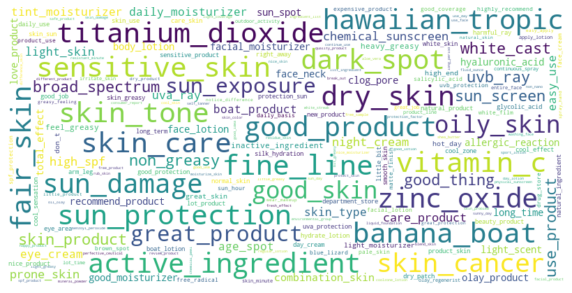

In [ ]:
score_dict = {}
for a, x in zip(list(sorted_scored_data['Bigrams']),list(sorted_scored_data['weighted_pmi'])):
    score_dict[a] = int(np.exp(x*1))

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(collocations = False,height = 400, width = 800, max_font_size = 40,background_color = "white")
wordcloud.generate_from_frequencies(frequencies=score_dict)
plt.figure(figsize= (10,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# import gensim

In [ ]:
# from gensim.models import Phrases

# from gensim.models.phrases import Phraser

# documents = ["the mayor of new york was there who is good at machine learning", "machine learning can be useful sometimes","new york mayor was present"]

# sentence_stream = [doc.split(" ") for doc in documents]
# print(sentence_stream)

# bigram = Phrases(sentence_stream, min_count=1, threshold=3, delimiter=b'_')

# bigram_phraser = Phraser(bigram)


# print(bigram_phraser)

# for sent in sentence_stream:
#     tokens_ = bigram_phraser[sent]

    print(tokens_)

[['the', 'texture', 'of', 'this', 'concealer', 'pallet', 'is', 'fantastic,', 'it', 'has', 'great', 'coverage', 'and', 'a', 'wide', 'variety', 'of', 'uses,', 'i', 'guess', "it's", 'meant', 'for', 'professional', 'makeup', 'artists', 'and', 'a', 'lot', 'of', 'the', 'colours', 'are', 'of', 'no', 'use', 'to', 'me', 'but', 'i', 'use', 'at', 'least', 'two', 'of', 'them', 'on', 'a', 'regular', 'basis,', 'and', 'two', 'more', 'occasionally,', 'which', 'is', 'the', 'only', 'reason', "i'm", 'giving', 'it', 'for', 'stars,', 'i', 'feel', 'like', 'the', 'range', 'of', 'colors', 'is', 'kind', 'of', 'a', 'waste', 'for', 'me,', 'but', 'the', '', 'product', 'itself', '', 'is', 'wonderful,', "it's", 'not', 'cakey,', 'gives', 'me', 'a', 'natural', 'for', 'and', 'concealed', 'my', 'imperfections,', 'therefore', 'i', 'highly', 'recommend', 'it'], ['machine', 'learning', 'can', 'be', 'useful', 'sometimes'], ['new', 'york', 'mayor', 'was', 'present']]
['the', 'texture', 'of', 'this', 'concealer', 'pallet', '

In [ ]:
# bigram_constractor("the mayor of new york was there who is good at machine learning")

['new_york', 'machine_learning']

In [ ]:
# bigram_constractor("machine learning can be useful sometimes")

['machine_learning']